In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
df = pd.read_csv('pokemon.csv')

### Data Dictionary -- List of variable names and data types

In [3]:
print('This is my data dictionary; 13 columns and the type of each column:')
df.info()

This is my data dictionary; 13 columns and the type of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#### Renaming the columns to make it easier for myself

In [15]:
df = df.rename({'#': 'id','Type 1':'type1','Type 2':'type2','Sp. Atk':'special_attack','Sp. Def':'special_defense'},axis=1)

#### I want to replace the null Type 2's with the string 'None'

In [16]:
null_type2 = df['type2'].isnull()
df.loc[null_type2, 'type2'] = 'None'

In [17]:
df.head()

,id,Name,type1,type2,Total,HP,Attack,Defense,special_attack,special_defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


### Initial Explorations

In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17118eb8>,
      dtype=object)

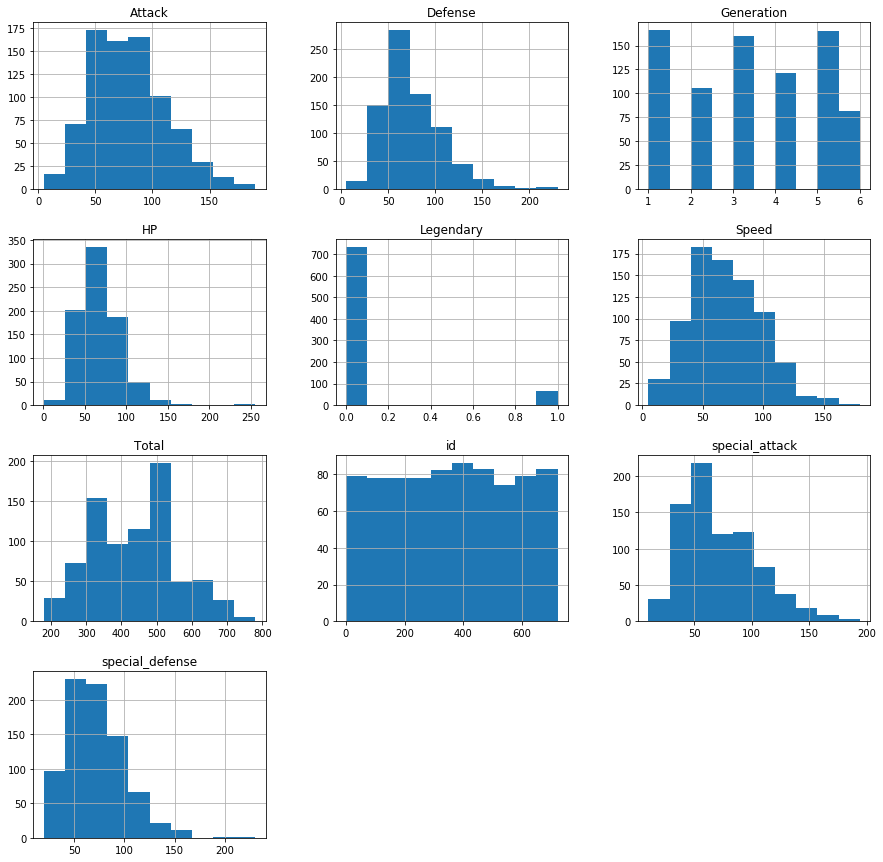

In [18]:
df.hist(figsize=(15,15))

### Do different types of Pokemon differ in their stats?

In [19]:
df.groupby('type1').mean()

,id,Total,HP,Attack,Defense,special_attack,special_defense,Speed,Generation,Legendary
type1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


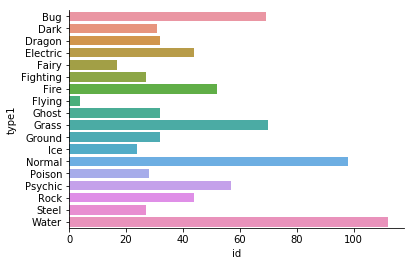

In [25]:
#Let's look at how many pokemon there are of each type
count_by_type = df.groupby('type1').count()
sns.barplot(count_by_type.id,count_by_type.index)
sns.despine()

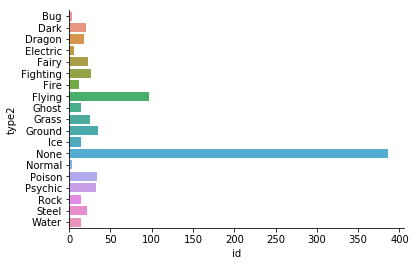

In [27]:
#What about by secondary type
count_by_type2 = df.groupby('type2').count()
sns.barplot(count_by_type2.id,count_by_type2.index)
sns.despine()

### What type is strongest in offense?

In [22]:
df.groupby('type1')['Attack'].describe()
#It looks like dragon types are the most offensive

,count,mean,std,min,25%,50%,75%,max
type1,,,,,,,,
Bug,69.0,70.971014,37.040904,10.0,45.00,65.0,90.00,185.0
Dark,31.0,88.387097,25.774247,50.0,65.00,88.0,100.00,150.0
Dragon,32.0,112.125000,33.742622,50.0,86.25,113.5,134.25,180.0
Electric,44.0,69.090909,23.764169,30.0,53.75,65.0,85.00,123.0
Fairy,17.0,61.529412,29.751298,20.0,45.00,52.0,72.00,131.0
Fighting,27.0,96.777778,28.290163,35.0,80.00,100.0,120.00,145.0
Fire,52.0,84.769231,28.769275,30.0,62.25,84.5,101.00,160.0
Flying,4.0,78.750000,37.500000,30.0,60.00,85.0,103.75,115.0
Ghost,32.0,73.781250,29.629687,30.0,53.75,66.0,92.75,165.0


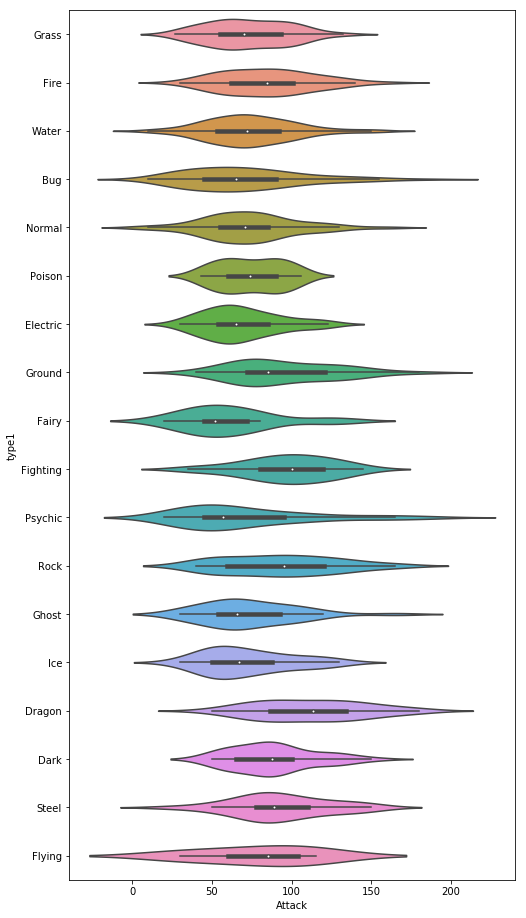

In [35]:
plt.figure(figsize = (8,16))
sns.violinplot(x="Attack", y="type1", data=df, split=True)

In [36]:
#What's the strongest pokemon?
df.Attack.max()

190

In [37]:
df[df.Attack == 190]
print()

,id,Name,type1,type2,Total,HP,Attack,Defense,special_attack,special_defense,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


### How do the populations of legendary and non-legendary pokemon differ?

In [38]:
df.groupby('Legendary').mean()

,id,Total,HP,Attack,Defense,special_attack,special_defense,Speed,Generation
Legendary,,,,,,,,,
False,353.315646,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
True,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231


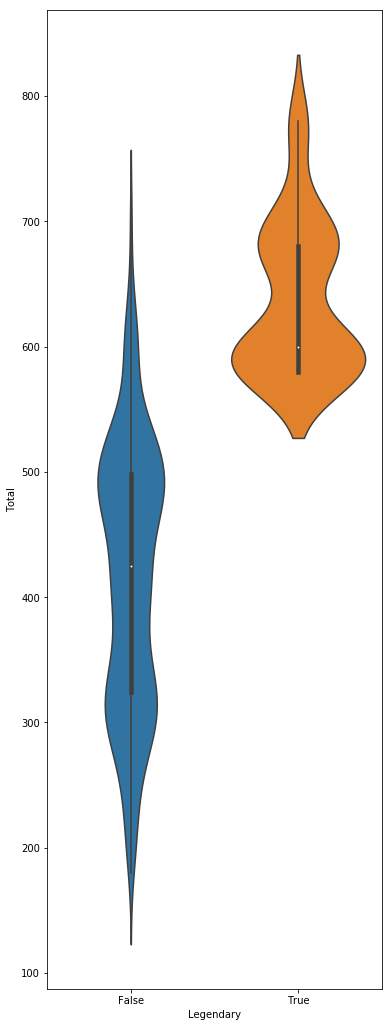

In [46]:
plt.figure(figsize = (6,18))
sns.violinplot(x='Legendary',y='Total',data=df)

Text(0.5,1,'Non-Legendary Total')

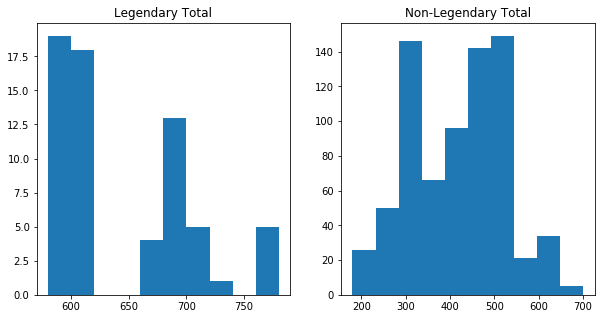

In [47]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
legendary = df[df.Legendary == True]
plt.hist(legendary.Total)
plt.title('Legendary Total')

plt.subplot(1, 2, 2)
non_legendary = df[df.Legendary == False]
plt.hist(non_legendary.Total)
plt.title('Non-Legendary Total')

### How are variables related?

In [48]:
df.corr()

,id,Total,HP,Attack,Defense,special_attack,special_defense,Speed,Generation,Legendary
id,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
special_attack,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
special_defense,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


The skew of special attack before was 0.7446624978300574 
After transforming is -0.2948241862954226
The correlation before was 0.3963617553492319 
After transforming is 0.3896976298016234


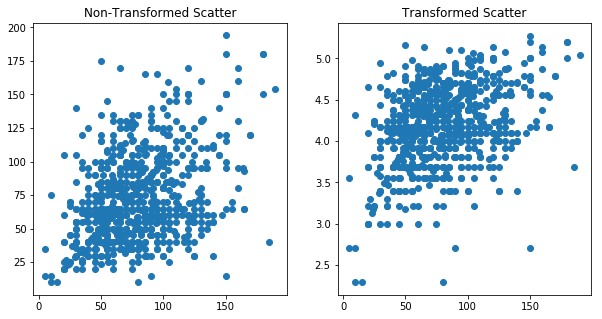

In [63]:
#Attack and special attack should be correlated but special attack is quite skewed; let's transform it
#Side by side scatters of non-transformed on left and transformed on right

print('The skew of special attack before was', df.special_attack.skew(), '\nAfter transforming is', np.log(df.special_attack.skew()))

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df.Attack,df.special_attack)
plt.title('Non-Transformed Scatter')

plt.subplot(1, 2, 2)
plt.scatter(df.Attack,np.log(df.special_attack))
plt.title('Transformed Scatter')
#Both seem to be vaguely positive

print('The correlation before was', np.corrcoef(df.Attack,df.special_attack)[1,0], '\nAfter transforming is', np.corrcoef(df.Attack,np.log(df.special_attack))[1,0])

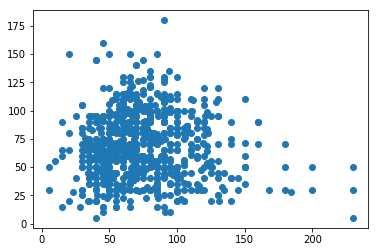

In [57]:
#I'm just curious to see what one of the lowest correlation graph looks like
plt.scatter(df.Defense,df.Speed)